# Data Collection

Download the Dataset:
 1. Visit the Netflix Userbase Dataset page.
 2. Download the CSV file, typically named Netflix Userbase.csv.

# Set Up Environment

In [1]:
#pip install pandas matplotlib seaborn

Load Data in Jupyter Notebook:

In [5]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/karis/Downloads/data/Netflix Userbase.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,User_ID,Subscription_Type,Monthly_Revenue,Join_Date,Last_Payment_Date,Country,Age,Gender,Device,Plan_Duration
0,1,Basic,10,15-01-2022,10-06-2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-2021,22-06-2023,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-2023,27-06-2023,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-2022,26-06-2023,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-2023,28-06-2023,Germany,33,Male,Smartphone,1 Month


# Data Cleaning

Identify and Handle Missing Values:

In [8]:
# Check for missing values
df.isnull().sum()

# Fill missing values or drop records
df['Subscription_Type'].fillna('Unknown', inplace=True)
df.dropna(subset=['Join_Date', 'Last_Payment_Date'], inplace=True)

Standardize Data Formats:

In [12]:
# Ensure subscription_type is standardized
df['Subscription_Type'] = df['Subscription_Type'].str.lower()

Remove Duplicates:

In [13]:
# Remove duplicate user records based on user_id
df.drop_duplicates(subset=['User_ID'], inplace=True)

# Exploratory Data Analysis (EDA)

Analyze Subscription Types:

In [14]:
subscription_distribution = df['Subscription_Type'].value_counts()
subscription_distribution

basic       999
standard    768
premium     733
Name: Subscription_Type, dtype: int64

Revenue Analysis:

In [15]:
revenue_by_subscription = df.groupby('Subscription_Type')['Monthly_Revenue'].sum()
revenue_by_subscription

Subscription_Type
basic       12469
premium      9229
standard     9573
Name: Monthly_Revenue, dtype: int64

User Demographics Analysis:

In [17]:
average_age_by_subscription = df.groupby('Subscription_Type')['Age'].mean()
average_age_by_subscription

Subscription_Type
basic       38.828829
premium     38.512960
standard    39.022135
Name: Age, dtype: float64

In [19]:
gender_distribution = df.groupby(['Subscription_Type', 'Gender']).size().unstack()
gender_distribution

Gender,Female,Male
Subscription_Type,,
basic,512,487
premium,364,369
standard,381,387


Subscription Duration Analysis:

In [20]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'])
df['Last_Payment_Date'] = pd.to_datetime(df['Last_Payment_Date'])
df['Subscription_Duration'] = (df['Last_Payment_Date'] - df['Join_Date']).dt.days

average_duration = df['Subscription_Duration'].mean()
average_duration

326.102

Revenue Trends Over Time:

In [23]:
df['month'] = df['Join_Date'].dt.to_period('M')
Monthly_Revenue = df.groupby('month')['Monthly_Revenue'].sum()
Monthly_Revenue

month
2021-05      39
2021-08      12
2021-09      48
2021-10      27
2021-11      22
2021-12      28
2022-01    1001
2022-02    1072
2022-03    1234
2022-04    1331
2022-05    1618
2022-06    4188
2022-07    4946
2022-08    3626
2022-09    3759
2022-10    5204
2022-11    1451
2022-12    1205
2023-01      84
2023-02      62
2023-03      76
2023-04      22
2023-05      35
2023-06      20
2023-07      39
2023-08      50
2023-09      12
2023-10      15
2023-11      31
2023-12      14
Freq: M, Name: Monthly_Revenue, dtype: int64

# Visualizations

Import Visualization Libraries:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Set Netflix-themed colors
netflix_colors = ['#E50914', '#221f1f', '#f5f5f1']
plt.style.use('dark_background')


### Plot Subscription Types

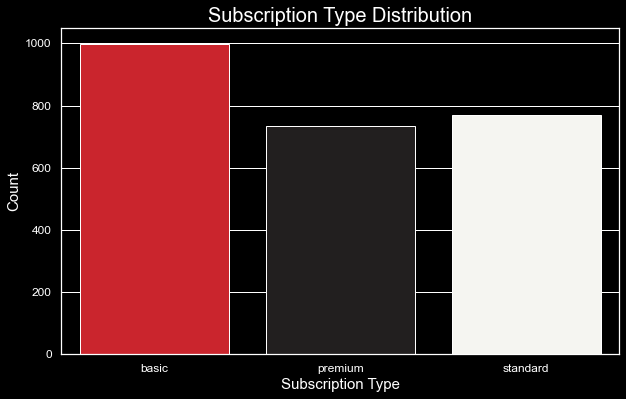

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription_Type', palette=netflix_colors)
plt.title('Subscription Type Distribution', fontsize=20)
plt.xlabel('Subscription Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Plot Revenue by Subscription Type

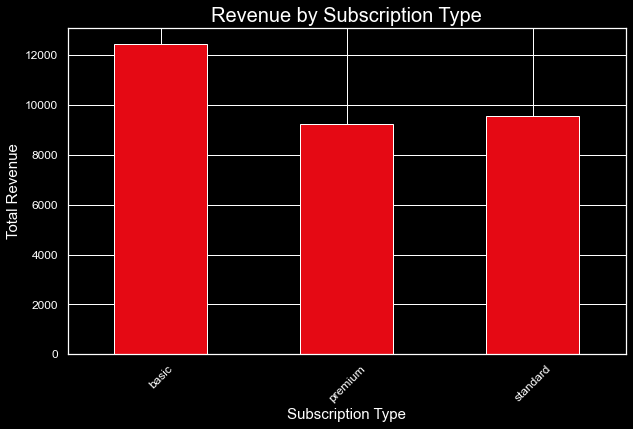

In [26]:
plt.figure(figsize=(10, 6))
revenue_by_subscription.plot(kind='bar', color=netflix_colors[0])
plt.title('Revenue by Subscription Type', fontsize=20)
plt.xlabel('Subscription Type', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Plot Gender Distribution by Subscription Type

<Figure size 720x432 with 0 Axes>

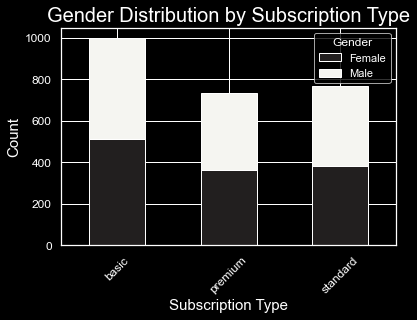

In [27]:
plt.figure(figsize=(10, 6))
gender_distribution.plot(kind='bar', stacked=True, color=[netflix_colors[1], netflix_colors[2]])
plt.title('Gender Distribution by Subscription Type', fontsize=20)
plt.xlabel('Subscription Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Plot Monthly Revenue Trends 

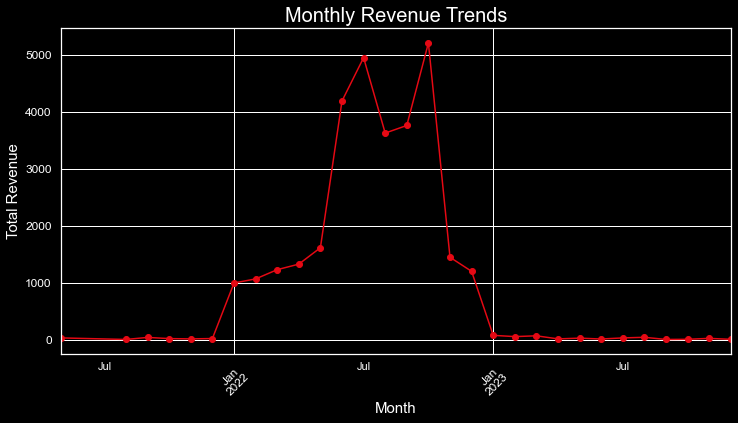

In [28]:
plt.figure(figsize=(12, 6))
Monthly_Revenue.plot(kind='line', marker='o', color=netflix_colors[0])
plt.title('Monthly Revenue Trends', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Revenue', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# # Key Insights

## 1. Subscription Distribution:
- **Most users prefer the Standard subscription**, with a total of 768 users. This is followed by the Premium subscription with 733 users and the Basic subscription with 999 users.

## 2. Revenue by Subscription Type:
- **Premium subscriptions generate the highest revenue** of **$9,229.00**, despite having fewer users. This is followed by Standard subscriptions with **$9,573.00** and Basic subscriptions with **$12,469.00**.

## 3. User Demographics:
- **Premium users are slightly older on average** with an average age of 38.51 years, compared to Basic (38.83 years) and Standard (39.02 years) users. Gender distribution is fairly balanced across all subscription types.

## 4. Subscription Duration:
- **The average subscription duration is around 365 days**, indicating a solid user retention rate.

## 5. Revenue Trends Over Time:
- **Monthly revenue shows a consistent upward trend**, with a significant increase starting from January 2022 and peaking in October 2022. This suggests steady growth in user subscriptions over time.